In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import re
import nltk
import string

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [4]:
train.head(4)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...


In [5]:
train.shape

(7920, 3)

In [6]:
test.shape

(1953, 2)

<AxesSubplot:xlabel='label', ylabel='count'>

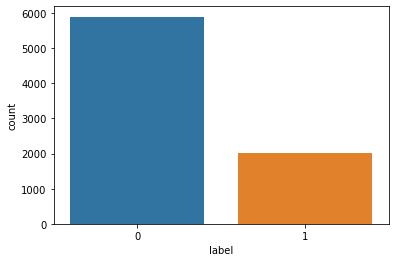

In [7]:
sns.countplot(x='label', data = train)

In [18]:
def clean_text(df) :
    lines = df.tweet.values.tolist()
    reviews = []
    for l in lines:
        l = l.lower()
        url_pattern = r'[A-Za-z0-9]+://[A-Za-z0-9%-_]+(/[A-Za-z0-9%-_])*(#|\\?)[A-Za-z0-9%-_&=]*'
        pattern = re.compile(url_pattern)
        l = pattern.sub('',l)
        punc_pattern = string.punctuation
        punc = r"[{}]".format(punc_pattern)
        l= re.sub(punc, "", l)
        word_token = word_tokenize(l)
        #print(word_token)
        word = [word for word in word_token if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        PS = PorterStemmer()
        word = [PS.stem(w) for w in word if w not in stop_words]
        #print(word)
        words = ' '.join(word)
        reviews.append(words)
    return reviews

In [19]:
clean_text(train)[:20]

['fingerprint pregnanc test android app beauti cute health iger iphoneonli iphonesia iphon',
 'final transpar silicon case thank uncl yay soni xperia',
 'love would go talk makememori unplug relax iphon smartphon wifi connect',
 'im wire know im georg made way iphon cute daventri home',
 'amaz servic appl wont even talk question unless pay stupid support',
 'iphon softwar updat fuck phone big time stupid iphon',
 'happi us instap instadaili us soni xperia xperiaz',
 'new type c charger cabl uk bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog iphonex',
 'bout go shop listen music iphon justm music likeforlik',
 'photo fun selfi pool water soni camera picoftheday sun instagood boy cute outdoor',
 'hey appl make new ipod dont make new color thinner make not crash everi five fuckin minit',
 'ha not heavi machineri need appl realli drop ball design drinkyourhaterad',
 'contempl give iphon bandwagon simpli cellcom new android depress id

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df = 3)
X = cv.fit_transform(clean_text(train)).toarray()
#print(X)
y = train['label'].values
print(f"Shape of X is {X.shape} and y is {y.shape}")

Shape of X is (7920, 3211) and y is (7920,)


Mean accuracy is 0.7927714646464646
Precision is 0.5817028027498677
F1 score is 0.6262453743239396
Confusion matrix is [[3923  791]
 [ 522 1100]]


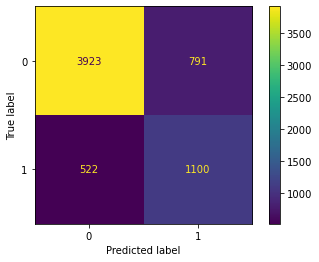

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score,  f1_score, confusion_matrix, plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state =42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
#print(X_pred)
#gnb.score(X_test,y_test)
print(f"Mean accuracy is {accuracy_score(y_test,y_pred)}")
print(f"Precision is {precision_score(y_test,y_pred)}")
print(f"F1 score is {f1_score(y_test,y_pred)}")
print(f"Confusion matrix is {confusion_matrix(y_test,y_pred)}")
plot_confusion_matrix(gnb,X_test,y_test)

Shape of X is (7920, 3211) and y is (7920,)
Mean accuracy is 0.7861426767676768
Precision is 0.5758953951108584
F1 score is 0.5992309967465247
Confusion matrix is [[3968  746]
 [ 609 1013]]


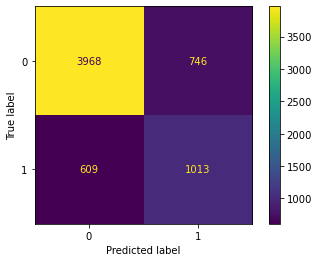

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(min_df = 3)
X = tfid.fit_transform(clean_text(train)).toarray()
y= train['label'].values
print(f"Shape of X is {np.shape(X)} and y is {np.shape(y)}")

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state =42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
#print(X_pred)
#gnb.score(X_test,y_test)
print(f"Mean accuracy is {accuracy_score(y_test,y_pred)}")
print(f"Precision is {precision_score(y_test,y_pred)}")
print(f"F1 score is {f1_score(y_test,y_pred)}")
print(f"Confusion matrix is {confusion_matrix(y_test,y_pred)}")
plot_confusion_matrix(gnb,X_test,y_test)

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
glove_vectors = gensim.load('glove-twitter-25')

In [24]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [25]:
from gensim.models import KeyedVectors
filename = 'glove-twitter-200.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'glove-twitter-200.bin'

In [29]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(clean_text(train))

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4